In [480]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import ppscore as pps

## Wybranie kolumn do analizy i wczytanie danych

In [481]:
important_columns = ['DEPRESSIONINDEX', 'DEPEPISODE', 'MDELASTYR', 'ANYTXRXMDE', 'CATAG3', 'CATAG7', 'IRSEX', 
    'NEWRACE2', 'ANYINDEX', 'MJANDCOKE', 'ILLICITDRUGUSE', 'LSYRILLICIT', 
    'COKECRACK', 'OTHERILLICIT', 'MARJLTYR', 'MJCOKELY', 'COCCRKLY', 
    'MJGT12MO', 'COCGT12MO', 'ANYGT12MO', 'ALCFMFPB', 'IREDUC2', 'EDU_DUMMY', 
    'INCOME', 'INCOME_R', 'POVERTY', 'IRPRVHLT', 'WORKFORCE', 'EMPSTAT4', 
    'MOVESPY2', 'CACHAR', 'CATYPE', 'CRIMEHIST', 'ANYSDRUG', 'ANYATTACK', 
    'ANYTHEFT', 'NUMARREST', 'HEALTH2', 'SCHDSICK', 'SCHDSKIP', 'TXLCAD', 'DSTNCALM', 'DSTTIRE', 'DSTSITST', 'DSTDEPRS', 'DSTCHEER', 'DSTNRVOS', 'YOWRSATP', 'YOWRSPLN', 'ADWRDLOT', 'ADWRSTHK', 'YO_MDEA4', 'ADWRSLEP', 'ADWRSMOR', 'YO_MDEA3', 'ADWRELES', 'IRMARIT', 'NOMARR2', 'RKIDSHH', 'MARRIED', 'CHILDRENINHOME']

In [482]:
df = pd.read_csv('./data/27521-0001-Data.tsv', sep='\t')
df = df[important_columns]

## Krótkie podsumowanie kolumn

In [483]:
# DEPEPISODE: -1 (Missing) Categorical
# MDELASTYR: -1 (Missing) Categorical
# ANYTXRXMDE: -9 (Missing) Categorical
# CATAG3: Categorical
# CATAG7: Categorical
# IRSEX: Categorical
# NEWRACE2: Categorical
# ANYINDEX: -1 (Missing) Numeric
# MJANDCOKE: Categorical
# ILLICITDRUGUSE: Categorical
# LSYRILLICIT: Categorical
# COKECRACK: -1 (Missing) Categorical
# OTHERILLICIT Categorical
# MARJLTYR Categorical
# MJCOKELY Categorical
# COCCRKLY Categorical
# MJGT12MO -9 (Missing) Categorical
# COCGT12MO -9 (Missing) Categorical
# ANYGT12MO -9 (Missing) Categorical
# ALCFMFPB 94, 97, 98 (Missing) Categorical
# IREDUC2 Categorical
# EDU_DUMMY Categorical
# INCOME Categorical
# INCOME_R Categorical
# POVERTY Categorical
# IRPRVHLT Categorical
# WORKFORCE -1 (Missing) Categorical
# EMPSTAT4: 99 (Missing) Categorical
# MOVESPY2: 994, 997, 998 (Missing) Categorical
# CACHAR: -9 (Missing) Categorical
# CATYPE: -9 (Missing) Categorical
# CRIMEHIST: -9 (Missing) Categorical
# ANYSDRUG: -1 (Missing) Categorical
# ANYATTACK: -1 (Missing) Categorical
# ANYTHEFT: -1 (Missing) Categorical
# NUMARREST: -9 (Missing) Categorical
# HEALTH2: -9 (Missing) Categorical
# SCHDSICK: 89, 90, 94, 97, 98, 99 (Missing) numeric
# SCHDSKIP 89, 94, 97, 98, 99 (Missing) numeric
# TXLCAD -1 (Missing) Categorical
# DSTNCALM 94, 97, 98, 99 (Missing) Categorical
# DSTTIRE 89, 94, 97, 98, 99 (Missing) Categorical
# DSTSITST 94, 97, 98, 99 (Missing) Categorical
# DSTDEPRS 89, 94, 97, 98, 99 (Missing) Categorical
# DSTCHEER 85, 94, 97, 98, 99 (Missing) Categorical
# DSTNRVOS 85, 89, 94, 97, 98, 99 (Missing) Categorical
# YOWRSATP 94, 97, 98, 99 (Legitimate skip) (Missing) Categorical
# YOWRSPLN 94, 97, 98, 99 (Legitimate skip) (Missing) Categorical
# ADWRDLOT 94, 97, 98, 99 (Legitimate skip) (Missing) Categorical
# ADWRSTHK 94, 97, 98, 99 (Legitimate skip) (Missing) Categorical
# YO_MDEA4 94, 97, 98, 99 (Legitimate skip) (Missing) Categorical
# ADWRSLEP 94, 97, 98, 99 (Legitimate skip) (Missing) Categorical
# ADWRSMOR 94, 97, 98, 99 (Legitimate skip) (Missing) Categorical
# YO_MDEA3 94, 97, 98, 99 (Legitimate skip) (Missing) Categorical
# ADWRELES 94, 97, 98, 99 (Legitimate skip) (Missing) Categorical
# IRMARIT 99 (Missing) Categorical
# NOMARR2 94. 97, 99 (Missing) Categorical
# RKIDSHH -1 (Missing) Categorical
# MARRIED Categorical
# CHILDRENINHOME Categorical

## Czyszczenie danych

In [484]:

df = df[df['DEPRESSIONINDEX'] != -9]

In [485]:

import numpy as np

missing_values = [-1, -9, 89, 94, 97, 98, 99, 994, 997, 998]

for missing_val in missing_values:
    df = df.replace(missing_val, np.nan)

# Calculate the percentage of missing values for each column
missing_percentage = df.isna().mean() * 100
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)

# Display the percentage of missing values for each column
print(missing_percentage_sorted)

columns_with_missing_values = missing_percentage[missing_percentage > 40].index
df = df.drop(columns_with_missing_values, axis=1)

columns_with_missing = missing_percentage[missing_percentage > 0].index

DSTNCALM           100.000000
DSTSITST           100.000000
DSTDEPRS           100.000000
DSTTIRE            100.000000
TXLCAD              98.336579
ADWRSMOR            98.274370
YOWRSATP            96.121389
YOWRSPLN            96.105161
YO_MDEA3            92.194093
YO_MDEA4            92.158931
ADWRELES            90.595586
ADWRSLEP            90.565834
ADWRSTHK            90.565834
ADWRDLOT            90.557719
NOMARR2             74.688954
SCHDSKIP            50.108190
DSTNRVOS            49.880991
DSTCHEER            49.813372
EMPSTAT4            49.480688
SCHDSICK            42.275235
IRMARIT             24.880991
ANYGT12MO            5.496051
MJGT12MO             4.381694
COKECRACK            2.534350
NUMARREST            1.695878
COCGT12MO            1.414584
MDELASTYR            1.190090
DEPEPISODE           1.052148
ALCFMFPB             1.022395
ANYTXRXMDE           0.900682
ANYSDRUG             0.311046
CRIMEHIST            0.267770
ANYTHEFT             0.243427
CATYPE    

Zaznaczamy odpowiednie wartości jako `nan` i jeśli brakuje więcej niz 40% danych dla danej kolumny, to ją usuwamy. Powyzej mozna zobaczyć ile procent danej kolumny brakuje.

## Uzupełnianie danych

In [487]:
from sklearn.impute import KNNImputer

# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the training data
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

Uzupełniamy pozostałe brakujące dane za pomocą KNNImputer

## Wybór zmiennych 

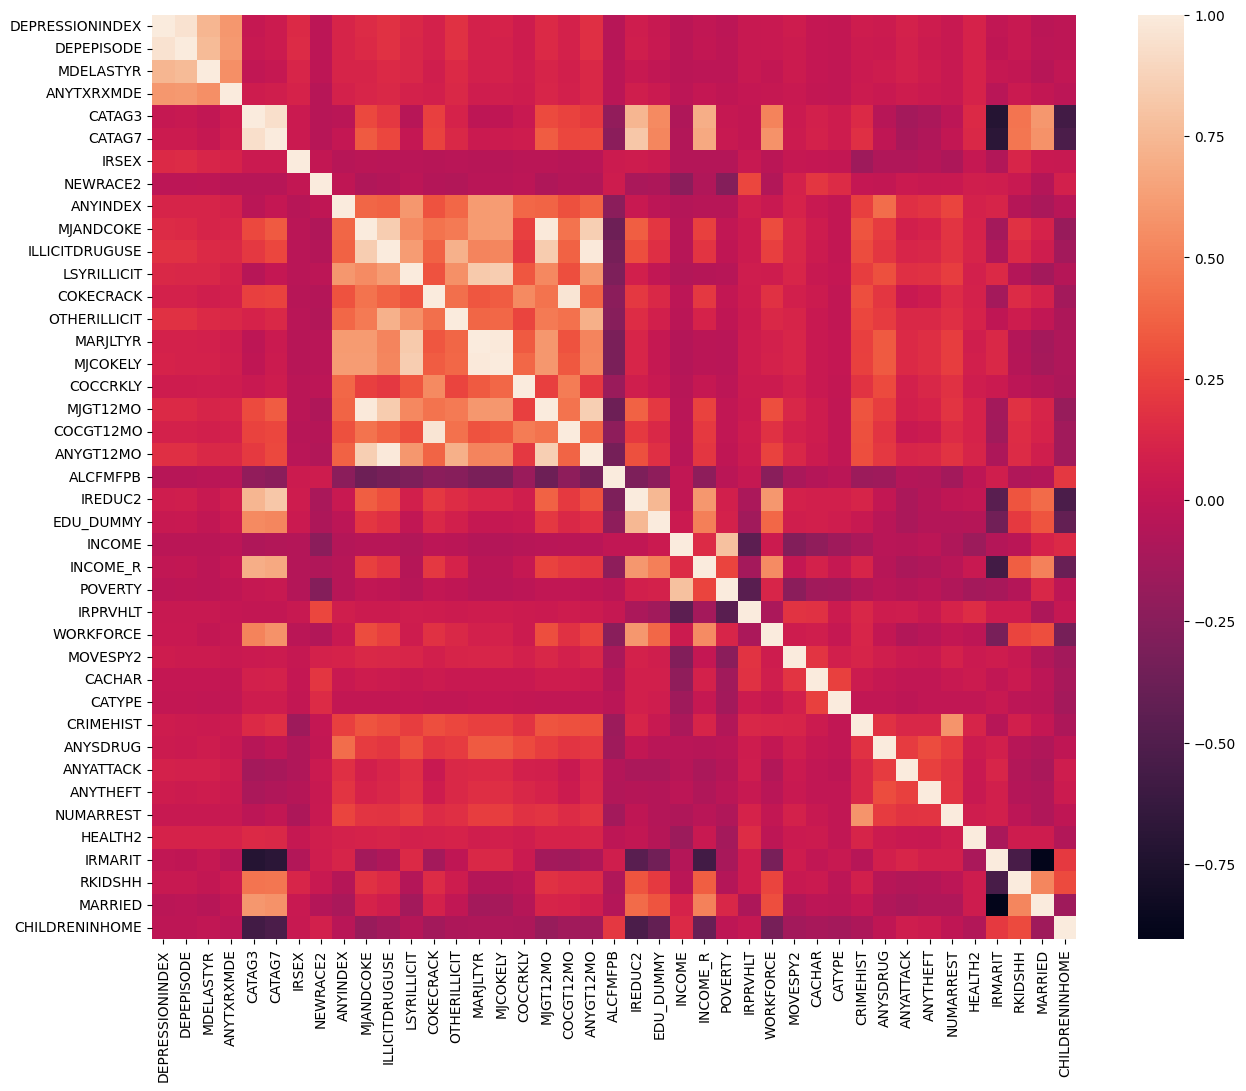

In [488]:
corrmat = df.corr(method='spearman')
# corrmat = corrmat[abs(corrmat['DEPRESSIONINDEX']) > 0.7]
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, square=True, vmax=1.0)
plt.show()

Wstępny podgląd korelacji między poszczególnymi kolumnami

DEPRESSIONINDEX    1.000000
DEPEPISODE         0.949602
MDELASTYR          0.732629
ANYTXRXMDE         0.593720
OTHERILLICIT       0.177845
ILLICITDRUGUSE     0.177730
ANYGT12MO          0.173263
MJANDCOKE          0.144724
IRSEX              0.140869
MJGT12MO           0.140359
LSYRILLICIT        0.132218
Name: DEPRESSIONINDEX, dtype: float64


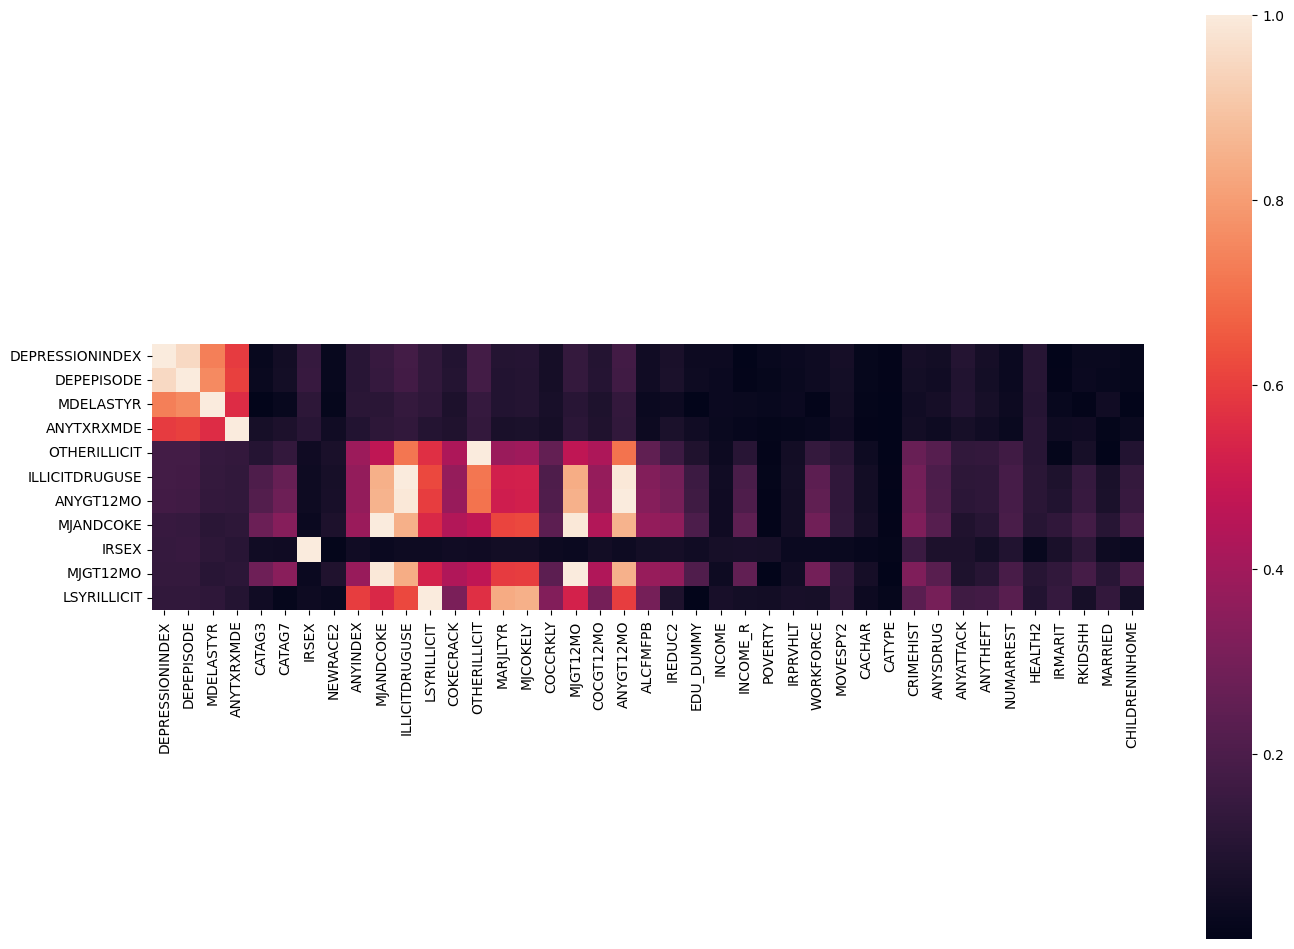

In [489]:
corrmat = corrmat.abs().sort_values(by='DEPRESSIONINDEX', ascending=False).head(11)
print(corrmat['DEPRESSIONINDEX'])
# corrmat = corrmat['DEPRESSIONINDEX']
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, square=True)
plt.show()

Wyszczególnienie korelacji dla DEPRESSIONINDEX. Mozemy zauwazyć, ze poza dwoma wartościami, korelacje są dość niskie i nie przekraczają 20%

## PPS

In [490]:
# Lista kolumn, które mają pozostać bez zmian
columns_to_change_to_string = ['DEPRESSIONINDEX', 'DEPEPISODE', 'MDELASTYR', 'ANYTXRXMDE', 'CATAG3', 'CATAG7', 'IRSEX', 'NEWRACE2', 'MJANDCOKE', 'ILLICITDRUGUSE', 'LSYRILLICIT', 'COKECRACK', 'OTHERILLICIT', 'MARJLTYR', 'MJCOKELY', 'COCCRKLY', 'MJGT12MO', 'COCGT12MO', 'ANYGT12MO', 'ALCFMFPB', 'IREDUC2', 'EDU_DUMMY', 'INCOME', 'INCOME_R', 'POVERTY', 'IRPRVHLT', 'WORKFORCE', 'EMPSTAT4', 'MOVESPY2', 'CACHAR', 'CATYPE', 'CRIMEHIST', 'ANYSDRUG', 'ANYATTACK', 'ANYTHEFT', 'NUMARREST', 'HEALTH2']

# Zamiana kolumn na string, oprócz wybranych
df_pps = df.apply(lambda x: x.astype(float) if x.name not in columns_to_change_to_string else x.astype(str))


Zamiana odpowiednich kolumn na string lub float, aby PPS traktował je jako odpowiedni typ zmiennych

In [491]:
pps_matrix = pps.matrix(df_pps)

sorted_pps = pps_matrix[(pps_matrix['x'] == 'DEPRESSIONINDEX')].sort_values(by='ppscore', ascending=False)

column_names = sorted_pps.iloc[2:8]['y'].tolist()
column_names

/Users/patryk/coding/python/EAD_project_2/.venv/lib/python3.11/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/Users/patryk/coding/python/EAD_project_2/.venv/lib/python3.11/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/Users/patryk/coding/python/EAD_project_2/.venv/lib/python3.11/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/Users/patryk/coding/python/EAD_project_2/.venv/lib/python3.11/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/Users/patryk/coding/python/EAD_project_2/.venv/lib/python3.11/site-packages/sklearn/mod

['MDELASTYR',
 'ANYTXRXMDE',
 'OTHERILLICIT',
 'ILLICITDRUGUSE',
 'ANYGT12MO',
 'MJANDCOKE']

Według PPS powyzsze zmienne mają największy wpływ na DEPRESSIONINDEX

## Tworzenie modelu

In [504]:
from scipy.stats import f_oneway

# Podział danych na grupy wiekowe
groups = df.groupby('CATAG3')[column_names]

# Test ANOVA dla każdego czynnika
for factor in column_names:
    group_data = [group[factor].dropna() for _, group in groups]
    f_stat, p_value = f_oneway(*group_data)
    print(f"ANOVA dla {factor}: F-stat={f_stat:.2f}, p-value={p_value:.4f}")

print('-'*60)

# Podział danych na grupy wiekowe
groups = df.groupby('IRSEX')[column_names]

# Test ANOVA dla każdego czynnika
for factor in column_names:
    group_data = [group[factor].dropna() for _, group in groups]
    f_stat, p_value = f_oneway(*group_data)
    print(f"ANOVA dla {factor}: F-stat={f_stat:.2f}, p-value={p_value:.4f}")

ANOVA dla MDELASTYR: F-stat=15.52, p-value=0.0000
ANOVA dla ANYTXRXMDE: F-stat=51.12, p-value=0.0000
ANOVA dla OTHERILLICIT: F-stat=351.34, p-value=0.0000
ANOVA dla ILLICITDRUGUSE: F-stat=929.25, p-value=0.0000
ANOVA dla ANYGT12MO: F-stat=998.85, p-value=0.0000
ANOVA dla MJANDCOKE: F-stat=1403.15, p-value=0.0000
------------------------------------------------------------
ANOVA dla MDELASTYR: F-stat=520.06, p-value=0.0000
ANOVA dla ANYTXRXMDE: F-stat=421.54, p-value=0.0000
ANOVA dla OTHERILLICIT: F-stat=59.80, p-value=0.0000
ANOVA dla ILLICITDRUGUSE: F-stat=46.62, p-value=0.0000
ANOVA dla ANYGT12MO: F-stat=50.54, p-value=0.0000
ANOVA dla MJANDCOKE: F-stat=34.46, p-value=0.0000


Wyniki testów ANOVA wskazują, ze rozkład zmiennych istotnie rózni się w zaleznosci od grupy wiekowej oraz od płci.

In [493]:
y = df['DEPRESSIONINDEX']
X = df[column_names]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=42, stratify=Y_test)

Podział zbiorów na treningowy, walidacyjny oraz testowy

In [506]:
import statsmodels.api as sm

# Add a constant to the independent variables matrix
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
X_valid = sm.add_constant(X_valid)

Y_train[Y_train > 0] = 1
Y_test[Y_test > 0] = 1
Y_valid[Y_valid > 0] = 1

# Train the OLS model
model = sm.OLS(Y_train, X_train).fit()

r2 = model.rsquared
r2_adj = model.rsquared_adj
aic = model.aic
bic = model.bic

print(f"R²: {r2:.4f}")
print(f"Adjusted R²: {r2_adj:.4f}")
print(f"AIC: {aic:.4f}")
print(f"BIC: {bic:.4f}")

R²: 0.5457
Adjusted R²: 0.5457
AIC: 3521.5843
BIC: 3579.6475


Wytrenowanie binarnego modelu OLS

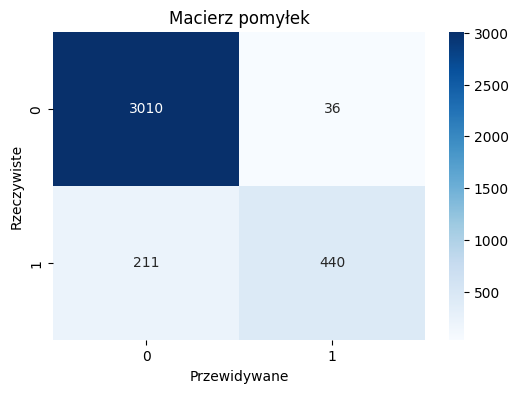

In [496]:
from sklearn.metrics import confusion_matrix as cm

y_pred = model.predict(X_valid)

thr = 0.531

probabilities = 1 / (1 + np.exp(-y_pred))
y_pred = probabilities > thr
probabilities = pd.DataFrame(probabilities, columns=['probability'])
probabilities = pd.merge(probabilities, X_valid, left_index=True, right_index=True)
probabilities = pd.merge(probabilities, Y_valid, left_index=True, right_index=True)


conff = cm(Y_valid, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conff, annot=True, fmt='d', cmap='Blues', xticklabels=np.linspace(0, 1, 2, dtype=np.uint8), yticklabels=np.linspace(0, 1, 2, dtype=np.uint8))
plt.title('Macierz pomyłek')
plt.xlabel('Przewidywane')
plt.ylabel('Rzeczywiste')
plt.show()

Jak widzimy, model testowany na zbiorze walidacyjnym radzi sobie całkiem dobrze - najwięcej wartości jest na diagonalii

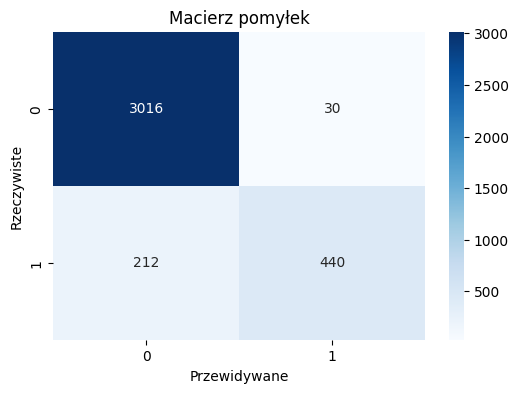

In [497]:
y_pred = model.predict(X_test)

probabilities = 1 / (1 + np.exp(-y_pred))
y_pred = probabilities > thr
probabilities = pd.DataFrame(probabilities, columns=['probability'])
probabilities = pd.merge(probabilities, X_test, left_index=True, right_index=True)
probabilities = pd.merge(probabilities, Y_test, left_index=True, right_index=True)

conff = cm(Y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conff, annot=True, fmt='d', cmap='Blues', xticklabels=np.linspace(0, 1, 2, dtype=np.uint8), yticklabels=np.linspace(0, 1, 2, dtype=np.uint8))
plt.title('Macierz pomyłek')
plt.xlabel('Przewidywane')
plt.ylabel('Rzeczywiste')
plt.show()

Odtworzenie analogicznego testu na zbiorze testowym potwierdza wcześniejsze wnioski

Grupa 1: 0.05
Grupa 2: 0.04
Grupa 3: 0.07
Grupa 4: 0.08
Grupa 5: 0.63


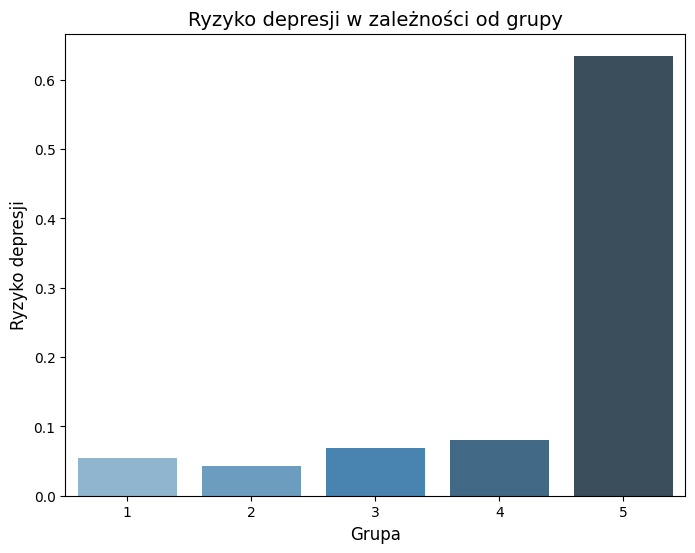

In [498]:
y_pred = model.predict(X_valid)

probabilities = 1 / (1 + np.exp(-y_pred))
y_pred = probabilities > thr
probabilities = pd.DataFrame(probabilities, columns=['probability'])
probabilities = pd.merge(probabilities, X_valid, left_index=True, right_index=True)
probabilities = pd.merge(probabilities, Y_valid, left_index=True, right_index=True)

probabilities = probabilities.sort_values(by='probability', ascending=True)
chunks = np.array_split(probabilities, 5)
depression_risks = np.array([])

lookup_table = []

for i, chunk in enumerate(chunks):
    # print(f'chunk min: ', chunk['probability'].min())
    # print(f'chunk max: ', chunk['probability'].max())
    if i == 0:
        lookup_table.append((0, chunk['probability'].max()))
    elif i == 4:
        lookup_table.append((chunk['probability'].min(), 1))
    else:
        lookup_table.append((chunk['probability'].min(), chunk['probability'].max()))
    depression_risk = chunk[chunk['DEPRESSIONINDEX'] > 0].shape[0] / chunk.shape[0]
    print(f"Grupa {i+1}: {depression_risk:.2f}")
    depression_risks = np.append(depression_risks, depression_risk)

# Wyświetlanie wykresów dla każdej grupy
plt.figure(figsize=(8, 6))
sns.barplot(x=[1, 2, 3, 4, 5], y=depression_risks, palette='Blues_d', hue=['1', '2', '3', '4', '5'])
# Tytuł wykresu i etykiety
plt.title('Ryzyko depresji w zależności od grupy', fontsize=14)
plt.xlabel('Grupa', fontsize=12)
plt.ylabel('Ryzyko depresji', fontsize=12)
plt.show()

Mozemy zaobserwować, ze wraz z numerem grupy ryzyka, wzrasta ryzyko wystąpienia deprsji. Anomalia w przypadku drugiej grupy wynika prawdopodobnie z niedkoładnośći modelu.

In [499]:
y_pred = model.predict(X_test)

probabilities = 1 / (1 + np.exp(-y_pred))
probabilities = pd.DataFrame(probabilities, columns=['probability'])
probabilities = pd.merge(probabilities, X_test, left_index=True, right_index=True)
probabilities = pd.merge(probabilities, Y_test, left_index=True, right_index=True)

def get_range_index(x, ranges):
    for idx, (start, end) in enumerate(ranges):
        if start <= x <= end:
            return idx
    return -1  # Jeśli liczba nie należy do żadnego zakresu (indeks -1)

probabilities['group'] = probabilities['probability'].apply(get_range_index, ranges=lookup_table)
grouped = probabilities.groupby('group').agg({'probability': 'count'})
grouped



,probability
group,
0,1938
2,479
3,809
4,472


Analiza po przypisaniu danych ze zbioru testowego do grup ryzyka wskazuje, ze najwiecej ludzi nalezy do grupy niskiego ryzyka, a najwięcej przypadków depresji przypada na grupę 3. Brak grupy 1 wynika z nakładających się przedziałów.

In [500]:
grouped = probabilities.groupby('group').mean()
grouped = grouped.drop(columns=['probability', 'const', 'DEPRESSIONINDEX'])

,MDELASTYR,ANYTXRXMDE,OTHERILLICIT,ILLICITDRUGUSE,ANYGT12MO,MJANDCOKE
group,,,,,,
0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.00000,0.000000,1.000000,1.000000,1.000000
3,0.000000,0.00000,0.986403,1.000000,0.997281,0.711990
4,0.736017,0.53178,0.495763,0.661017,0.607627,0.497881


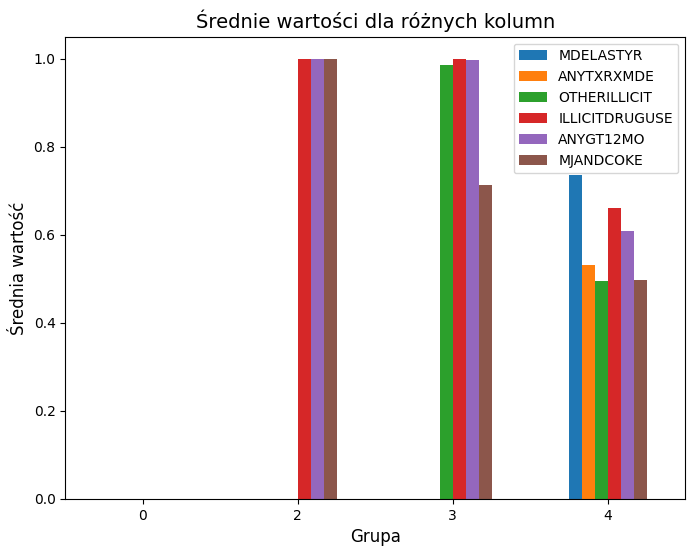

In [501]:

grouped.plot(kind='bar', figsize=(8, 6))

# Dodanie tytułów i etykiet
plt.title('Średnie wartości dla różnych kolumn', fontsize=14)
plt.xlabel('Grupa', fontsize=12)
plt.ylabel('Średnia wartość', fontsize=12)

# Wyświetlenie wykresu
plt.xticks(rotation=0)  # Obrót etykiet osi X
plt.show()
# Wyświetlenie wykr

Mozemy zaobserwowac, ze wartosci odpowiedzialne za wystepowanie depresji znacząco róznią się między grupami ryzyka. W przypadku pierwszej grupy, ich wartości średnie są zerowe. Wraz z kolejnymi grupami zwiększa się ilość czynników, lecz spada ich średnia, co sugeruje, ze większy wpływ na stopień depresji ma sam fakt występowania pewnych zachowań, a nie ich natęzenie